In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
import pickle
sys.path.append('/home/jiarong/research/postprocessing/functions/')
from TurStat import TurStat

In [2]:
# Assemble the data in the form of x, y, z, t, quantities
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/stopforcing_restore_second')
(field, tset, ptnum) = pickle.load( open( "ensemble", "rb" ) )

In [3]:
Stat1 = TurStat(field, tset)

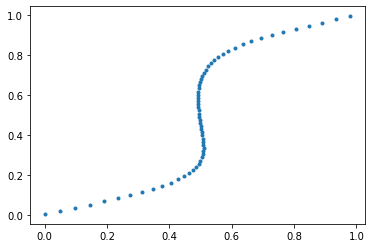

In [13]:
Stat1.ensemble_aver()
from Slicing import Slicing
slicer_en_aver = Slicing(Stat1.field_en_aver, dimension = 3)

# Still needs testing
slicer_en_aver.get_grid_set('y')
ux_aver = np.zeros(len(slicer_en_aver.grid_set))
for j, y in enumerate(slicer_en_aver.grid_set):
    ux_aver[j], fluc, number = slicer_en_aver.statistics('y', y, header = 'u.x')
#     ux_aver[j], __, __ = filename.rpartition('.')
plt.plot(ux_aver, slicer_en_aver.grid_set, '.')

In [ ]:
# Compute fluctuation <uw>

### Fit the Law of Wall
$\nu_{a}$ = 16.6/RE  
RE = 4000:  $\nu$ = 4.1545e-4  
RE = 40000:  $\nu$ = 4.1545e-5  
$u^{*2} = \nu \frac{\partial U}{\partial y}$  = 0.0113, the viscous velocity scale  
$\delta_{\nu} = \nu / u^{*}$ = 4.1545e-5/0.0113 = 0.003, the viscous length scale

In [6]:
y = np.array(slicer_en_aver.grid_set)
u_star = ((ux_aver[1] - ux_aver[0]) / (y[1] - y[0]) * 4.1545e-5) ** 0.5
u_plus = ux_aver/u_star
y_plus = y*u_star/4.1545e-5

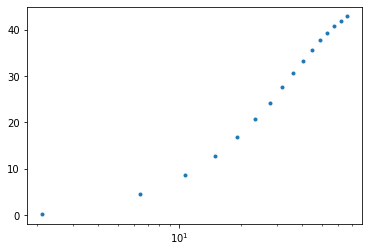

In [11]:
plt.plot(y_plus[0:16], u_plus[0:16], '.')
plt.xscale('log')

0.045245274208655324 -48.788814158141044


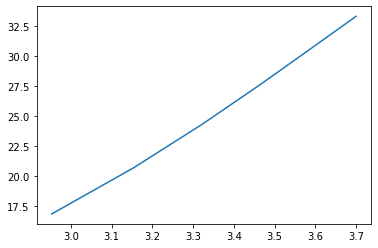

In [12]:
y = y_plus[4:10]
u = u_plus[4:10]
plt.plot(np.log(y), u)
a, b = np.polyfit(np.log(y), u, 1)
print(1/a, b)